Работа с сайтом "Открытые данные Министерства культуры" https://opendata.mkrf.ru/item/api.
Цель работы - узнать, насколько в музеях самых густонаселенных городов России (города-миллионники, первые 5) представлены предметы, связанные с Грецией, Римом и Египтом.

In [225]:
#Экспорт
import requests
import pandas as pd
import json
from flatten_json import flatten
import time

#Список для датасетов и ключ API
list_of_all_dfs = []
key = "90da7261df99906ff5cf795892fb89a5437ac94e89b838ca1ba88177c324cff8"

#Списки для автоматического поиска сразу по объектам и музеям городов
objects = ["греция", "рим", "египет"]
museum_cities = ["москва", "санкт-петербург", "казань", "новосибирск", "екатеринбург"]

#Цикл, с помощью которого ищутся каждый из объектов в каждом из городов
for obj in objects:
    for city in museum_cities:
        print(f"Предметы, связанные с'{obj.upper()}' в музеях города {city.upper()}")
        
        total_records = 0
        for s in range(0, 222000, 1000):
            #Без этой функции таймера происходила ошибка
            time.sleep(0.3)
            
            #Параметры для запроса, позволяющие обращаться отдельно к каждому элементов списков
            params = {
                "data.name": {"$search": obj},
                "data.museum.name": {"$search": city},
                "data.productionPlace": {"$ne": "россия"}
            }
            
            encoded_params = json.dumps(params, ensure_ascii=False)
            url = f"https://opendata.mkrf.ru/v2/museum-exhibits/$?f={encoded_params}&s={s}&l=1000"
            
            response = requests.get(url, headers={"X-API-KEY": key}, timeout=15)
            response.raise_for_status()
            data = response.json()
                
            #Проверка наличия данных на сайте
            if data['data']:
                records = [flatten(record) for record in data['data']]
                df = pd.DataFrame(records)
                    
                list_of_all_dfs.append(df)
                total_records += len(df)
                    
                print(f"Нашлось {len(df)}")
            else:
                break
                    
                
print("Done")

Предметы, связанные с'ГРЕЦИЯ' в музеях города МОСКВА
Нашлось 116
Предметы, связанные с'ГРЕЦИЯ' в музеях города САНКТ-ПЕТЕРБУРГ
Нашлось 848
Предметы, связанные с'ГРЕЦИЯ' в музеях города КАЗАНЬ
Предметы, связанные с'ГРЕЦИЯ' в музеях города НОВОСИБИРСК
Нашлось 11
Предметы, связанные с'ГРЕЦИЯ' в музеях города ЕКАТЕРИНБУРГ
Предметы, связанные с'РИМ' в музеях города МОСКВА
Нашлось 1000
Нашлось 963
Предметы, связанные с'РИМ' в музеях города САНКТ-ПЕТЕРБУРГ
Нашлось 1000
Нашлось 1000
Нашлось 1000
Нашлось 1000
Нашлось 1000
Нашлось 905
Предметы, связанные с'РИМ' в музеях города КАЗАНЬ
Нашлось 17
Предметы, связанные с'РИМ' в музеях города НОВОСИБИРСК
Нашлось 142
Предметы, связанные с'РИМ' в музеях города ЕКАТЕРИНБУРГ
Нашлось 58
Предметы, связанные с'ЕГИПЕТ' в музеях города МОСКВА
Нашлось 736
Предметы, связанные с'ЕГИПЕТ' в музеях города САНКТ-ПЕТЕРБУРГ
Нашлось 1000
Нашлось 1000
Нашлось 233
Предметы, связанные с'ЕГИПЕТ' в музеях города КАЗАНЬ
Предметы, связанные с'ЕГИПЕТ' в музеях города НОВОСИБИРС

In [178]:
list_of_all_dfs

[                          _id  nativeId                      hash   data_id  \
 0    5c3e1a5e93fa687ca4b2b5b4  10320947  2018-01-09T10:15:21.444Z  10320947   
 1    5c3e0c5493fa687ca4e6b142  10586827  2018-03-13T10:24:16.000Z  10586827   
 2    5c3e087e93fa687ca4af34db  11319571  2018-03-26T14:06:42.671Z  11319571   
 3    5c3e095593fa687ca4bb8771  11686240  2018-04-17T08:56:17.116Z  11686240   
 4    5c3e09c493fa687ca4c19623  11889542  2018-05-02T14:43:15.888Z  11889542   
 ..                        ...       ...                       ...       ...   
 111  5c3e157a93fa687ca46c4774   7751922  2017-04-02T10:17:23.451Z   7751922   
 112  5c3e157a93fa687ca46c4793   7751937  2017-04-02T10:17:23.451Z   7751937   
 113  5c3e157b93fa687ca46c4800   7751988  2017-04-02T10:17:23.451Z   7751988   
 114  5c3e1dcf93fa687ca4e4dd2e   8245241  2017-06-30T08:12:45.377Z   8245241   
 115  5c3e1dcf93fa687ca4e4d6a1   8245281  2017-06-30T08:12:45.377Z   8245281   
 
                                      

In [181]:
df_all = pd.DataFrame()
for df in list_of_all_dfs:
    df_all = pd.concat([df_all,df])

df_all

,_id,nativeId,hash,data_id,data_name,data_productionPlace,data_description,data_partsCount,data_regNumber,data_invNumber,...,changes_2_diff_10_value,changes_2_diff_11_op,changes_2_diff_11_path,changes_2_diff_11_value,changes_0_diff_4_value_url,changes_1_diff_18_op,changes_1_diff_18_path,changes_1_diff_19_op,changes_1_diff_19_path,odSetVersions_1
0,5c3e1a5e93fa687ca4b2b5b4,10320947,2018-01-09T10:15:21.444Z,10320947,Книга. Легенды и мифы Древней Греции. - Москва...,Москва г.,В твердом переплете темно-синего цвета с тисне...,1.0,10215727,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5c3e0c5493fa687ca4e6b142,10586827,2018-03-13T10:24:16.000Z,10586827,Листовка. Причт Пирейской Свято-Ольгинской цер...,"Греция, г. Пирей",Содержит призыв о пожертвованиях.,1.0,10945539,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5c3e087e93fa687ca4af34db,11319571,2018-03-26T14:06:42.671Z,11319571,Арсеньев Константин Иванович. История народов ...,Санктпетербург,Полукожаный владельческий переплёт. Корешок ко...,1.0,11202122,РК1-IV-20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5c3e095593fa687ca4bb8771,11686240,2018-04-17T08:56:17.116Z,11686240,Книга-альбом. Греция античная и современная. Ч...,"Греция, г. Афины","Антикварное издание, представляет собой подбор...",1.0,11571052,РК-593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5c3e09c493fa687ca4c19623,11889542,2018-05-02T14:43:15.888Z,11889542,"Документ. Рукописный текст ""Древняя Греция"", а...",NaN,Язык: русский,1.0,11772684,Ф.199,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5c3e083a93fa687ca4ab18c5,11189133,2018-03-20T06:43:10.106Z,11189133,Бегство в Египет.,NaN,NaN,1.0,11070504,Ж-2689,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5f99e40a1c266ee13d53e377,24884355,2020-09-07T05:50:24.360Z,24884355,Отдых на пути в Египет,"Италия, Флоренция",NaN,1.0,24736169,Ж-435,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5c3dfb260b2cb0575b725713
2,632a2cf279b98c2c8ec49b2d,38249787,2022-09-06T08:36:35.962Z,38249787,Иконный образец (прорись). Преподобная Мария Е...,"Российская империя, Пермская губ., Екатеринбур...",NaN,1.0,38033781,ГФ-1651,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,632a2cf279b98c2c8ec49b4f,38249824,2022-09-06T08:36:35.962Z,38249824,Иконный образец (прорись). Преподобная Мария р...,"Российская империя, Пермская губ., Екатеринбур...",NaN,1.0,38033763,ГФ-1652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


По параметром найденных записей всего:

In [182]:
len(df_all)

12050

### Вывод:
На сайте представлено очень много объектов, связанных с Римом, Грецией и Египтов, которые находятся в музеях в городах-миллионниках - 12.050.

In [183]:
print(f'Названия всех колонок: {df_all.columns.tolist()}')

Названия всех колонок: ['_id', 'nativeId', 'hash', 'data_id', 'data_name', 'data_productionPlace', 'data_description', 'data_partsCount', 'data_regNumber', 'data_invNumber', 'data_gikNumber', 'data_type', 'data_statusId', 'data_museum_id', 'data_museum_name', 'data_museum_code', 'data_museum_inn', 'data_typology_id', 'data_typology_name', 'data_typology_obsolete', 'data_dimStr', 'data_startDate', 'data_precision', 'data_periodStr', 'data_regDate', 'data_extSystem_id', 'data_authors_0', 'data_technologies_0', 'data_technologies_1', 'data_technologies_2', 'data_images_0_url', 'status', 'errorFields_0_keyword', 'errorFields_0_dataPath', 'errorFields_0_schemaPath', 'errorFields_0_params_type', 'errorFields_0_message', 'nativeName', 'activated', 'created', 'modified', 'odSetVersions_0', 'odSetVersion', 'updateSession', 'odSchema', 'dataset', 'data_typology_code', 'data_dimUnit_name', 'changes_0_modified', 'changes_0_diff_0_op', 'changes_0_diff_0_path', 'changes_0_diff_0_value_url', 'changes

Достаем самые важные и несущие основную информацию колонки. Создаем новый датафрейм только с ними.

In [184]:
important_columns = [
    'data_name', 'data_description', 'data_typology_name',
    'data_regNumber', 'data_invNumber', 'data_productionPlace',
    'data_startDate', 'data_finishDate', 'data_periodStr',
    'data_museum_name', 'data_technologies_0', 'data_authors_0',
    'data_images_0_url'
]

filtered_df = df_all[important_columns]

In [185]:
filtered_df

,data_name,data_description,data_typology_name,data_regNumber,data_invNumber,data_productionPlace,data_startDate,data_finishDate,data_periodStr,data_museum_name,data_technologies_0,data_authors_0,data_images_0_url
0,Книга. Легенды и мифы Древней Греции. - Москва...,В твердом переплете темно-синего цвета с тисне...,предметы печатной продукции,10215727,,Москва г.,1957-01-01T12:00:00.000Z,NaN,1957 г.,Государственное бюджетное учреждение культуры ...,бумага,Кун Н.,http://goskatalog.ru/muzfo-imaginator/rest/ima...
1,Листовка. Причт Пирейской Свято-Ольгинской цер...,Содержит призыв о пожертвованиях.,документы,10945539,,"Греция, г. Пирей",1929-01-01T12:00:00.000Z,NaN,Не ранее 1929 г.,Государственное бюджетное учреждение культуры ...,ротапринт,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...
2,Арсеньев Константин Иванович. История народов ...,Полукожаный владельческий переплёт. Корешок ко...,редкие книги,11202122,РК1-IV-20,Санктпетербург,1825-01-01T12:00:00.000Z,NaN,1825,Государственное бюджетное учреждение культуры ...,NaN,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...
3,Книга-альбом. Греция античная и современная. Ч...,"Антикварное издание, представляет собой подбор...",редкие книги,11571052,РК-593,"Греция, г. Афины",1901-01-01T12:00:00.000Z,1910-01-01T12:00:00.000Z,Начало XX века,Государственное бюджетное учреждение культуры ...,коленкор,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...
4,"Документ. Рукописный текст ""Древняя Греция"", а...",Язык: русский,документы,11772684,Ф.199,NaN,1964-01-01T12:00:00.000Z,NaN,1964 г.,Государственное бюджетное учреждение культуры ...,рукопись карандашом,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,Бегство в Египет.,NaN,живопись,11070504,Ж-2689,NaN,2014-01-01T12:00:00.000Z,NaN,2014,"Муниципальное автономное учреждение культуры ""...",картон грунтованный,Горланова Нина Викторовна,http://goskatalog.ru/muzfo-imaginator/rest/ima...
1,Отдых на пути в Египет,NaN,живопись,24736169,Ж-435,"Италия, Флоренция",1620-01-01T12:00:00.000Z,1639-01-01T12:00:00.000Z,1620-1630-е гг,"Муниципальное автономное учреждение культуры ""...",холст,Сиджисмондо Коккапани / Sigismondo Coccapani,http://goskatalog.ru/muzfo-imaginator/rest/ima...
2,Иконный образец (прорись). Преподобная Мария Е...,NaN,графика,38033781,ГФ-1651,"Российская империя, Пермская губ., Екатеринбур...",1801-01-01T12:00:00.000Z,1900-01-01T12:00:00.000Z,XIX в.,"Муниципальное автономное учреждение культуры ""...",бумага голубая,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...
3,Иконный образец (прорись). Преподобная Мария р...,NaN,графика,38033763,ГФ-1652,"Российская империя, Пермская губ., Екатеринбур...",1801-01-01T12:00:00.000Z,1900-01-01T12:00:00.000Z,XIX в.,"Муниципальное автономное учреждение культуры ""...",оттиск,NaN,http://goskatalog.ru/muzfo-imaginator/rest/ima...


## Разведочный анализ данных

Изучим основную информацию о полученном датасете и визуализируем полученные данные.
Перед этим отформатируем дату и извлечем год для удобного анализа.

In [186]:
filtered_df['data_startDate'] = pd.to_datetime(filtered_df['data_startDate'], errors='coerce')
filtered_df['year'] = filtered_df['data_startDate'].dt.year

C:\Users\риночка\AppData\Local\Temp\ipykernel_29024\3472240031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['data_startDate'] = pd.to_datetime(filtered_df['data_startDate'], errors='coerce')
C:\Users\риночка\AppData\Local\Temp\ipykernel_29024\3472240031.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['data_startDate'].dt.year


Основные статистики

In [187]:
print(f"Всего экспонатов: {len(filtered_df)}")
print(f"Уникальные музеи: {filtered_df['data_museum_name'].nunique()}")
print(f"Уникальные места производства: {filtered_df['data_productionPlace'].nunique()}")

Всего экспонатов: 12050
Уникальные музеи: 83
Уникальные места производства: 666


Медиана года создания:

In [188]:
median_year = filtered_df['year'].median()
print(median_year)

1920.0


Уникальные музеи:

In [189]:
filtered_df['data_museum_name'].nunique()

83

Соотношение музеев и количества экспонатов в нем:

In [190]:
top_museums = filtered_df['data_museum_name'].value_counts()
print(top_museums)

data_museum_name
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный музей истории Санкт-Петербурга"                                                                                                               6806
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный Музей истории Санкт-Петербурга"                                                                                                               1241
Государственное бюджетное учреждение культуры и дополнительного образования города Москвы "Мультимедийный комплекс актуальных искусств"                                                                                           619
Государственное бюджетное учреждение культуры города Москвы "Государственный музей А.С. Пушкина"                                                                                                                                  522
Санкт-Петербургское государственное бюджетное учреждение культу

Музеи Петербурга имеют больше всего экспонатов. Это может быть связано с тем, что Питер - культурный центр России, и огромная часть музеев и культурных объектов находится именно там. Но немало предметов есть также и в московских музеях.

Экспонаты по местам производства:

In [191]:
prod_place = filtered_df['data_productionPlace'].value_counts()
print(prod_place)

data_productionPlace
                      2050
  Париж.               758
Италия.                656
Италия.  Рим.          507
СССР, г. Москва        488
                      ... 
  Roma.                  1
Челябинск                1
  Paris (Париж).         1
Горький                  1
Германия.  Эрфурт.       1
Name: count, Length: 666, dtype: int64


Больше всего объектов, созданные в Европе - в Париже, Италии. Также есть созданные в СССР.

Наличие изображений

In [192]:
print(f"Экспонатов с изображениями: {filtered_df['data_images_0_url'].notna().sum()}")
print(f"Экспонатов без изображений: {filtered_df['data_images_0_url'].isna().sum()}")

Экспонатов с изображениями: 12042
Экспонатов без изображений: 8


In [219]:
filtered_df[filtered_df['data_images_0_url'].isna()]

,data_name,data_description,data_typology_name,data_regNumber,data_invNumber,data_productionPlace,data_startDate,data_finishDate,data_periodStr,data_museum_name,data_technologies_0,data_authors_0,data_images_0_url,year
640,Ренессансная имитация римской монеты с профиле...,Аверс - профиль императора вправо в лавровом в...,предметы нумизматики,1974414,,Падуя,NaT,NaN,XVI в.,Государственное бюджетное учреждение культуры ...,NaN,NaN,NaN,NaN
925,"""Король Римский"". Гравюра","В орнаментальной рамке овальный портрет, предс...",графика,3281810,Гр-1157,"Франция, Париж",1860-01-01 12:00:00+00:00,1869-01-01T12:00:00.000Z,1860-е гг.,Санкт-Петербургское государственное бюджетное ...,гравюра,Жирарде Карл,NaN,1860.0
956,Фигура Н. А. Римского-Корсакова к проекту памя...,"фигура стоящая, голова повёрнута вправо и слег...",скульптура,3774091,ск-20,"Ленинград, СССР",1944-01-01 12:00:00+00:00,NaN,1944,Санкт-Петербургское государственное бюджетное ...,гипс,Ск. Боголюбов Вениамин Яковлевич (1895-1954),NaN,1944.0
957,Бюст Н. А. Римского-Корсакова к проекту памятн...,"погрудный, без плечей, голова повёрнута вправо...",скульптура,3774220,ск-21,"Ленинград, СССР",1944-01-01 12:00:00+00:00,NaN,1944,Санкт-Петербургское государственное бюджетное ...,гипс,Боголюбов Вениамин Яковлевич (1895-1954),NaN,1944.0
958,"Модель памятника Н. А. Римскому-Корсакову, уст...","фигура, сидящая на садовой скамье; голова немн...",скульптура,3774242,ск-22,"Ленинград, СССР",1945-01-01 12:00:00+00:00,NaN,Фигура 1945. Пьедестал 1955,Санкт-Петербургское государственное бюджетное ...,дерево тонированное,арх. Шепилевский Модест Анатольевич (1906-1982),NaN,1945.0
700,"""Отдых на пути в Египет"". Гравюра",NaN,графика,3280376,Гр-854,"Франция, Париж",1861-01-01 12:00:00+00:00,NaN,1861,Санкт-Петербургское государственное бюджетное ...,бумага,Беттацци,NaN,1861.0
134,"Рисунок с картины Пуссена ""Отдых на пути в Еги...",Многофигурная композиция на фоне античной архи...,графика,7539663,Г 3669,NaN,1970-01-01 12:00:00+00:00,NaN,1970,Санкт-Петербургское государственное бюджетное ...,графитный карандаш,Кагарлицкий Владимир Кимович,NaN,1970.0
135,"Рисунок с картины Пуссена ""Отдых на пути в Еги...",На фоне античного архитектурного пейзажа сидит...,графика,7539656,Г 3671,NaN,1970-01-01 12:00:00+00:00,1971-01-01T12:00:00.000Z,1970-1971 гг,Санкт-Петербургское государственное бюджетное ...,карандаш (цветной и графитный),Даниэль Сергей Михайлович,NaN,1970.0


Понятно, что большинство экспонатов имеют изображения. Однако паттерна среди этих экспонатов никакого нет - возможно, данные отсутствуют просто так.

Топ-5 музеев по количеству экспонатов: 

In [193]:
top_museums = filtered_df['data_museum_name'].value_counts().head(5)
print(top_museums)

data_museum_name
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный музей истории Санкт-Петербурга"                                     6806
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный Музей истории Санкт-Петербурга"                                     1241
Государственное бюджетное учреждение культуры и дополнительного образования города Москвы "Мультимедийный комплекс актуальных искусств"                 619
Государственное бюджетное учреждение культуры города Москвы "Государственный музей А.С. Пушкина"                                                        522
Санкт-Петербургское государственное бюджетное учреждение культуры "Санкт-Петербургский государственный музей театрального и музыкального искусства"     339
Name: count, dtype: int64


Видно, что больше всего экспонатов находится в музеях Питера. Это логично, даже несмотря на повторяющиеся названия музеев (как здесь первые 2 - разница в 1 букве).
Понятно, что требуется дополнительная работа с датасетом - например, приведение всех названий музеев к одному размеру букв для исключения таких случаев.

## Группировка

In [194]:
type_museum = filtered_df.groupby(['data_typology_name', 'data_museum_name']).size().unstack(fill_value=0)

print(type_museum)

data_museum_name                                   Государственное автономное учреждение культуры Новосибирской области "Новосибирский государственный краеведческий музей"  \
data_typology_name                                                                                                                                                            
графика                                                                                            3                                                                          
документы                                                                                         16                                                                          
живопись                                                                                           2                                                                          
предметы естественнонаучной коллекции                                                              0                         

Группировка по музеям и местам производства:

In [195]:
museum_origin = filtered_df.groupby(['data_museum_name', 'data_productionPlace']).agg({
    'year': ['count', 'mean', 'median'],
    'data_images_0_url': lambda x: x.notna().mean()
})

print(museum_origin)

                                                                                                       year  \
                                                                                                      count   
data_museum_name                                   data_productionPlace                                       
Государственное автономное учреждение культуры ... Англия, Лондон, США, Нью-Йорк                          1   
                                                   Восточная Сибирь (?)                                   1   
                                                   Египет                                                 4   
                                                   Италия                                                 5   
                                                   Куба государство                                       1   
...                                                                                                     ...   
С

Доля экспонатов с изображениями:

In [196]:
image_stats = filtered_df.groupby('data_typology_name')['data_images_0_url'].apply(lambda x: x.notna().mean())

print(image_stats)

data_typology_name
графика                                              0.998571
документы                                            1.000000
живопись                                             1.000000
предметы естественнонаучной коллекции                1.000000
предметы нумизматики                                 0.987179
предметы печатной продукции                          1.000000
предметы прикладного искусства, быта и этнографии    1.000000
предметы техники                                     1.000000
прочие                                               1.000000
редкие книги                                         1.000000
скульптура                                           0.961039
фотографии и негативы                                1.000000
Name: data_images_0_url, dtype: float64


Технологическая уникальность музеев:

In [197]:
    museum_uniqueness = filtered_df.groupby('data_museum_name')['data_technologies_0'].nunique() / filtered_df['data_technologies_0'].nunique()

    print(museum_uniqueness.sort_values(ascending=False))

data_museum_name
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный музей истории Санкт-Петербурга"                                     0.287781
Санкт-Петербургское государственное бюджетное учреждение культуры "Государственный Музей истории Санкт-Петербурга"                                     0.162379
Государственное бюджетное учреждение культуры города Москвы "Государственный музей А.С. Пушкина"                                                       0.125402
Государственное бюджетное учреждение культуры города Москвы "Музейное объединение "Музей Москвы"                                                       0.080386
Санкт-Петербургское государственное бюджетное учреждение культуры "Санкт-Петербургский государственный музей театрального и музыкального искусства"    0.077170
                                                                                                                                                         ...   
Государственное бюджетн

## Визуализация

C:\Users\риночка\AppData\Local\Temp\ipykernel_29024\645688424.py:11: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1400x700 with 0 Axes>

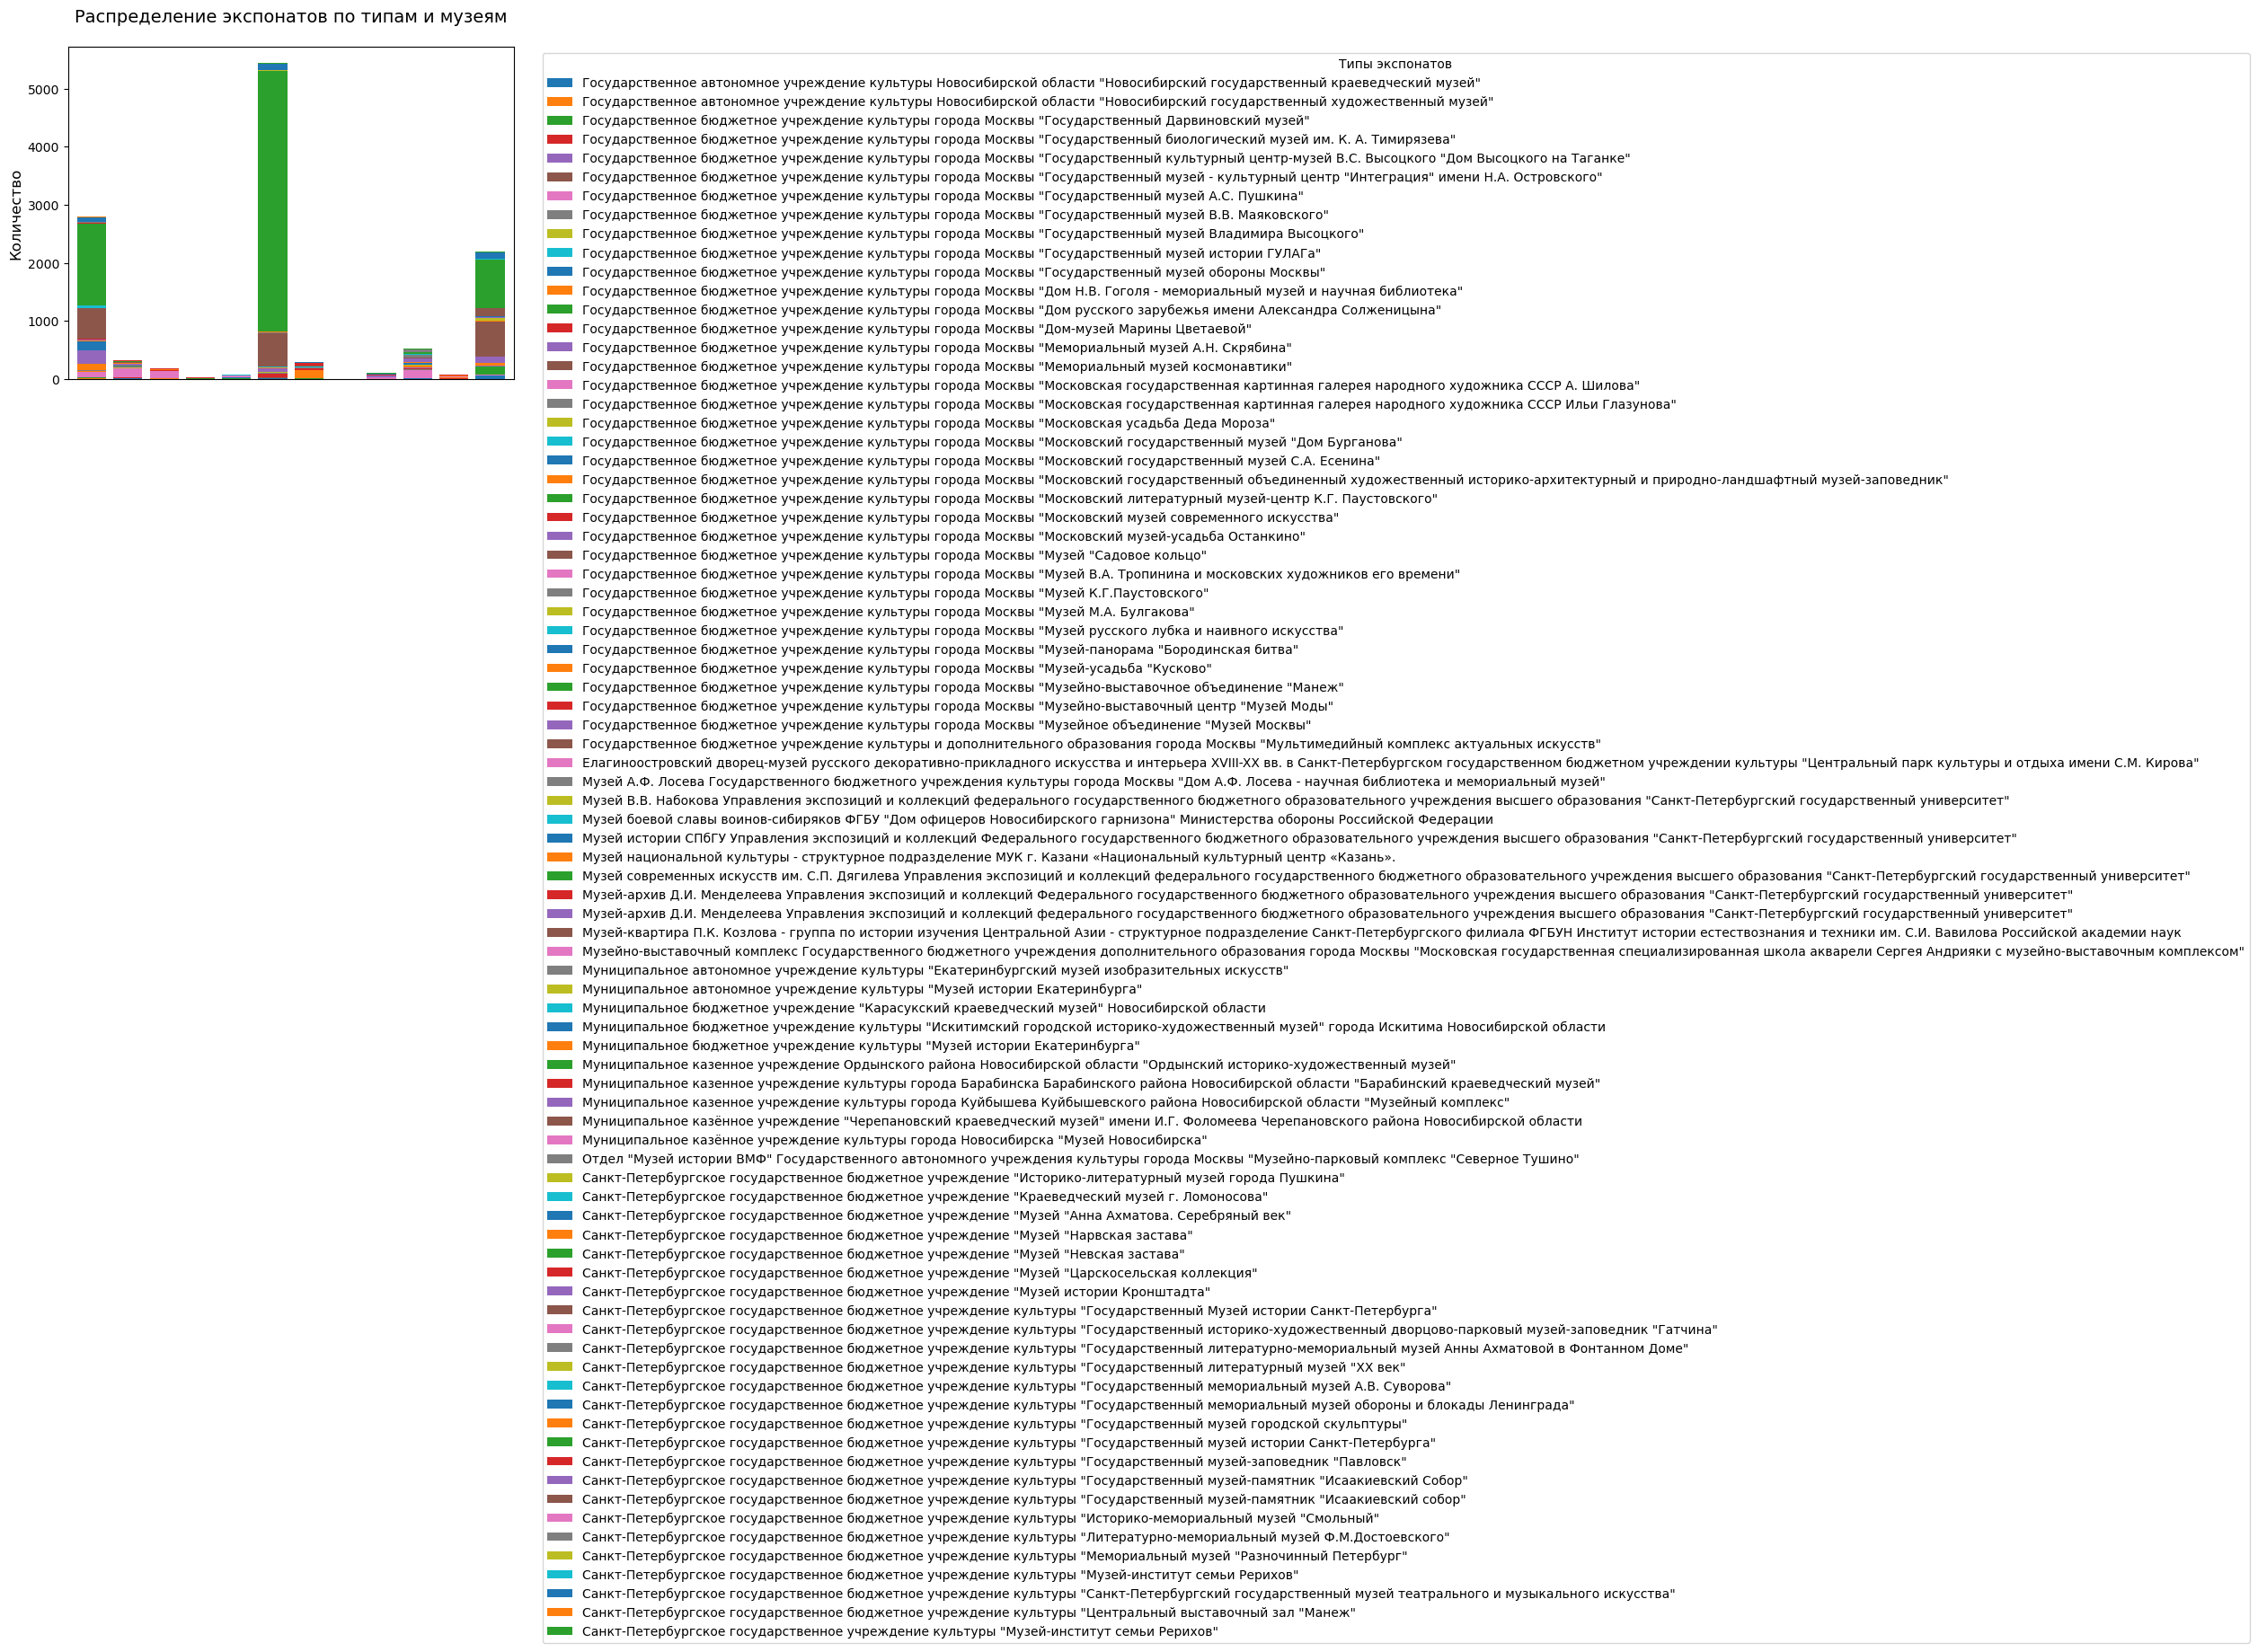

In [198]:
plt.figure(figsize=(14, 7))
type_museum.plot(kind='bar', stacked=True, width=0.8)

plt.title('Распределение экспонатов по типам и музеям', fontsize=14, pad=20)
plt.ylabel('Количество', fontsize=12)
plt.xlabel('')
plt.xticks([])

plt.legend(title='Типы экспонатов', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('museum_plot.png', bbox_inches='tight', dpi=300)
plt.show()

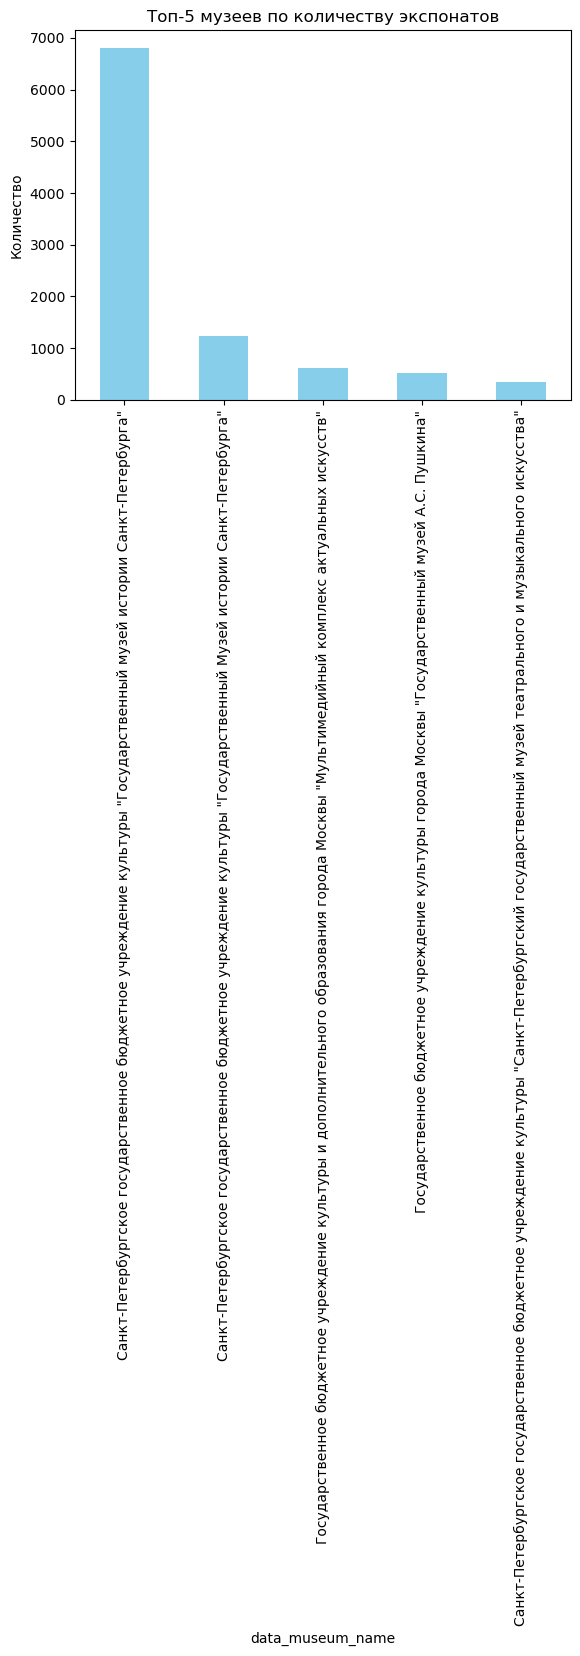

In [211]:
type_museum.sum().sort_values(ascending=False).head(5).plot(kind='bar', color='skyblue')
plt.title('Топ-5 музеев по количеству экспонатов')
plt.ylabel('Количество')
plt.show()

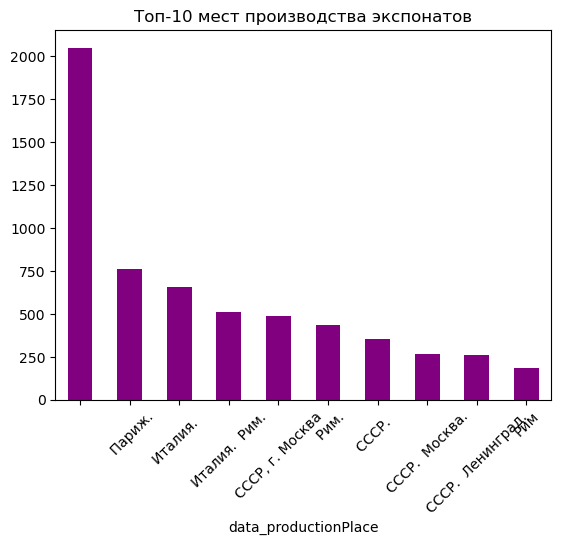

In [213]:
filtered_df['data_productionPlace'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title('Топ-10 мест производства экспонатов')
plt.xticks(rotation=45)
plt.show()

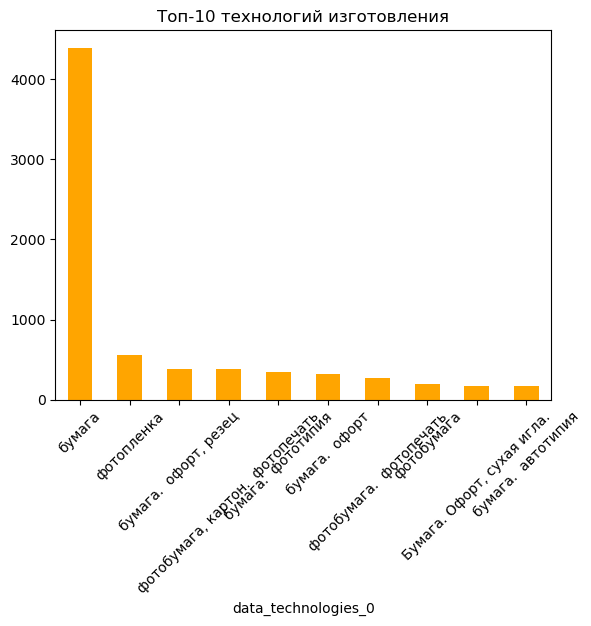

In [201]:
filtered_df['data_technologies_0'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Топ-10 технологий изготовления')
plt.xticks(rotation=45)
plt.show()

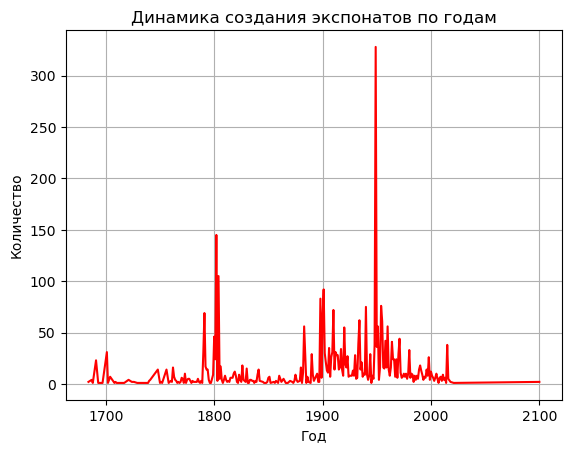

In [216]:
filtered_df['year'].value_counts().sort_index().plot(kind='line', color='red')
plt.title('Динамика создания экспонатов по годам')
plt.xlabel('Год')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

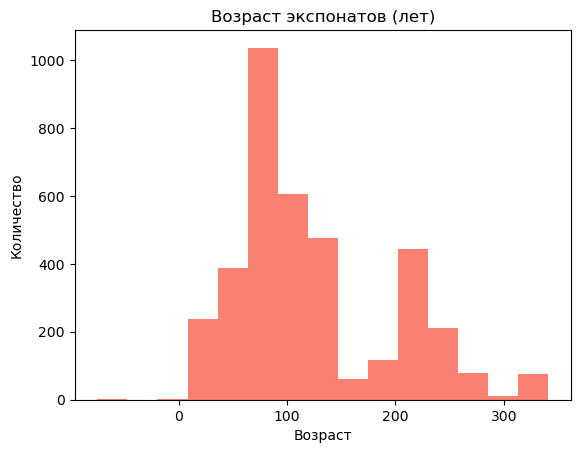

In [217]:
current_year = pd.Timestamp.now().year
ages = current_year - filtered_df['year'].dropna()
plt.hist(ages, bins=15, color='salmon')
plt.title('Возраст экспонатов (лет)')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [221]:
filtered_df.to_csv('vilms.csv', index=False)

# Основные выводы
1. Санкт-Петербург доминирует в представленности экспонатов - больше всего представлено объектов в Государственном музее истории СПБ. Кроме этого, много предметов находятся в специализирующихся на театральном и музыкальном искусстве, литературе музеях комплексах. Московские музеи находятся на 2 месте по количеству музейных предметов. При этом другие города, например, Новосибирск и Екатеринбург, слабо представлены.Это может быть связано с приоритетами местных музеев, которые могут сосредотачиваться на национальной истории, этнографии и региональных артефактах.

2. Данные, несмотря на то что находятся в государственных источниках, все равно имеют ошибки, неполные данные. Также многие столбцы заполнены по-разному, например, год создания. Это мешает делать точный полноценный анализ и означает, что необходима дополнительная работа с ними. Так как экспонатов в датасете очень много, на это потребуется много времени.

Таким образом, с помощью сайта МинКульта получилось проанализировать и узнать, насколько в музеях самых густонаселенных городов России (города-миллионники, первые 5) представлены предметы, связанные с Грецией, Римом и Египтом. 